## Understanding the relations for the items in Groceries 

### Import neccessary libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv('E:/ML projects/Workspace/dataset/Groceries_dataset.csv')

In [61]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [63]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [64]:
df.shape

(38765, 3)

In [65]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

> To reduce the data size due to my system limitations, we are randomly sampling 8,000 records from the original 38,765 records.

In [66]:
df_sampled = df.sample(n=8000, random_state=42)

In [67]:
df_sampled['Date']=pd.to_datetime(df['Date'])

In [68]:
df_sampled.head()

,Member_number,Date,itemDescription
22400,1449,2015-10-03,tropical fruit
38462,3010,2014-06-13,hygiene articles
36986,4789,2015-04-09,specialty cheese
2182,1884,2015-12-11,frankfurter
32319,1997,2015-12-28,pastry


In [69]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 22400 to 27053
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    8000 non-null   int64         
 1   Date             8000 non-null   datetime64[ns]
 2   itemDescription  8000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 250.0+ KB


#### plotting top 10 Sold items 

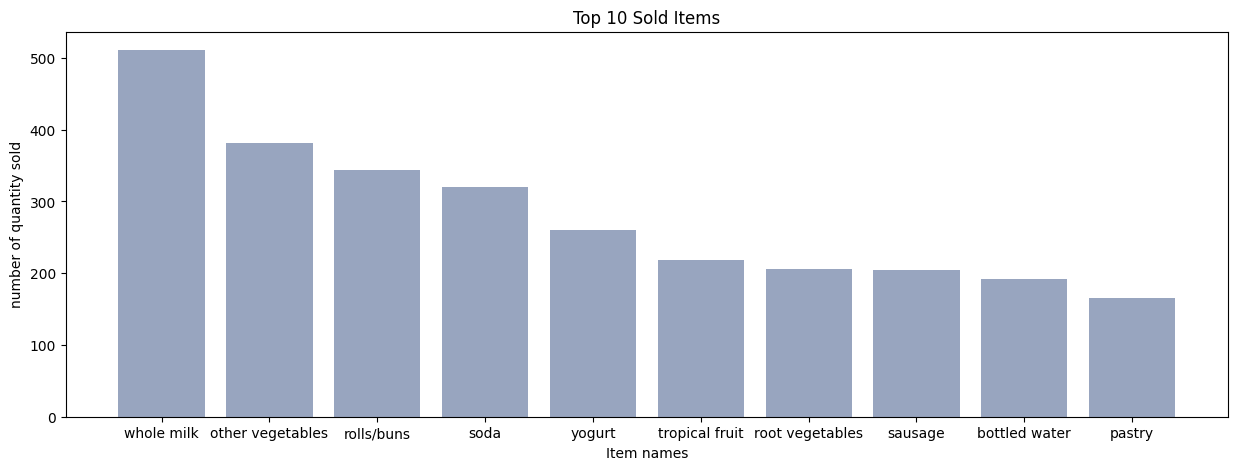

In [70]:
Item_distr=df_sampled.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency',ascending=False).head(10)
bars=Item_distr["itemDescription"]
height=Item_distr["Frequency"]
x_pos=np.arange(len(bars))

plt.figure(figsize=(15,5))

plt.bar(x_pos,height,color=(0.2,0.3,0.5,0.5))

plt.title("Top 10 Sold Items")
plt.xlabel("Item names")
plt.ylabel("number of quantity sold")

plt.xticks(x_pos,bars)
plt.show()

#### making date as index

In [71]:
df_date=df_sampled.set_index(['Date'])
df_date

,Member_number,itemDescription
Date,,
2015-10-03,1449,tropical fruit
2014-06-13,3010,hygiene articles
2015-04-09,4789,specialty cheese
2015-12-11,1884,frankfurter
2015-12-28,1997,pastry
...,...,...
2015-08-13,1233,butter milk
2015-03-10,2407,onions
2014-02-23,3380,frozen fish


#### Plotting how many number of items sold by month

<Axes: title={'center': 'number of item sold by month'}, xlabel='date', ylabel='number of item sold'>

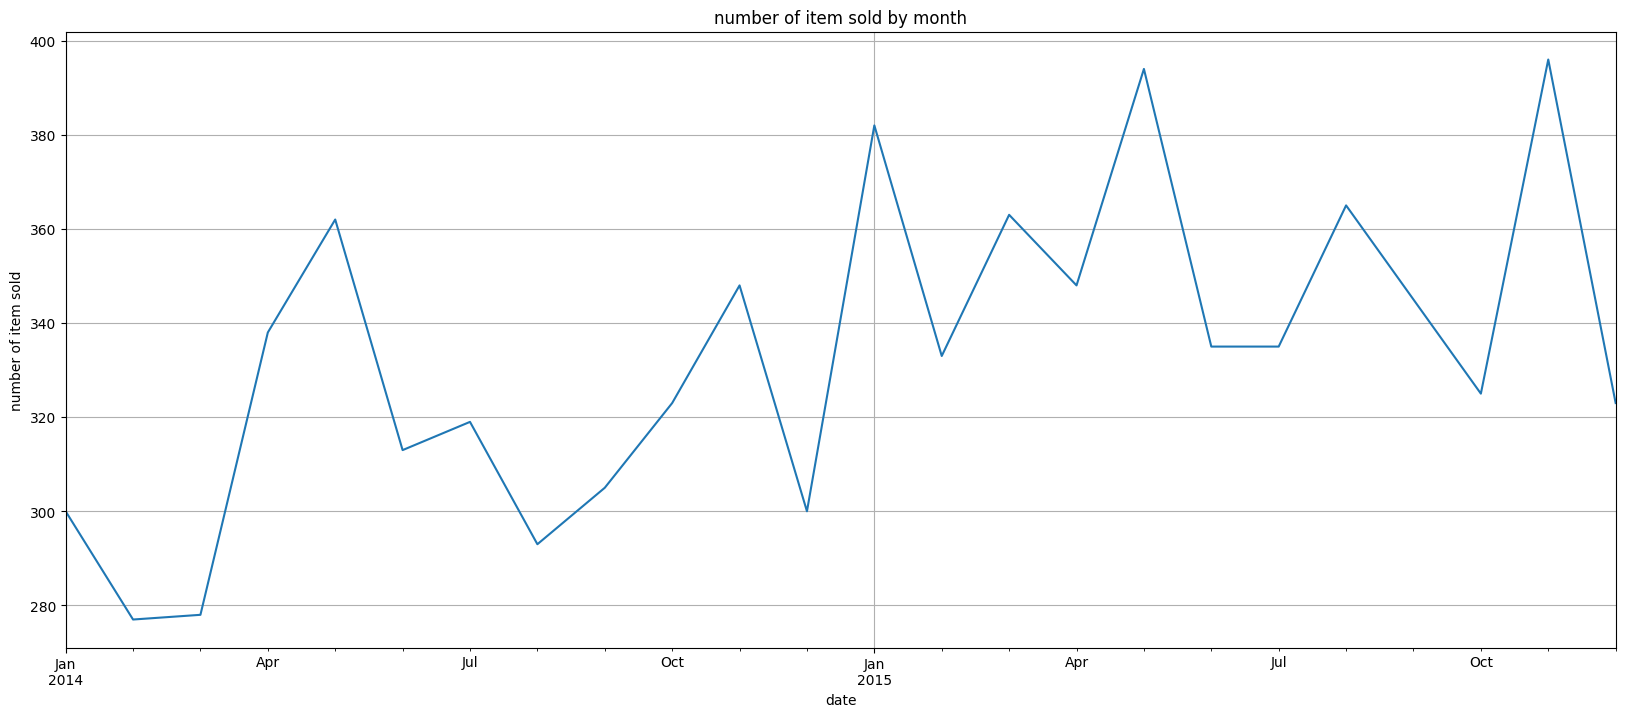

In [72]:
df_date.resample("M")["itemDescription"].count().plot(figsize=(20,8),grid=True,title='number of item sold by month',xlabel='date',ylabel="number of item sold")

In [73]:
custlevel=df_sampled[['Member_number','itemDescription']].sort_values(by="Member_number",ascending=False)
custlevel["itemDescription"]=custlevel['itemDescription'].str.strip()
custlevel

,Member_number,itemDescription
3578,5000,soda
25489,5000,other vegetables
5427,4999,tropical fruit
14840,4999,semi-finished bread
28320,4999,detergent
...,...,...
22761,1001,white bread
32851,1000,salty snack
22537,1000,hygiene articles
29480,1000,pastry


#### making to all transactions into a list

In [74]:
transactions=[a[1]['itemDescription'].tolist() for a in list(custlevel.groupby(['Member_number']))]

In [75]:
%pip install apyori

Note: you may need to restart the kernel to use updated packages.


#### Importing Model 

In [76]:
from apyori import apriori
rules=apriori(transactions=transactions,min_support=0.002,min_confidence=0.05,min_length=2)


In [77]:
results=list(rules)

In [78]:
results

[RelationRecord(items=frozenset({'bottled water'}), support=0.05821596244131456, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'bottled water'}), confidence=0.05821596244131456, lift=1.0)]),
 RelationRecord(items=frozenset({'other vegetables'}), support=0.11424100156494522, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'other vegetables'}), confidence=0.11424100156494522, lift=1.0)]),
 RelationRecord(items=frozenset({'pastry'}), support=0.05070422535211268, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'pastry'}), confidence=0.05070422535211268, lift=1.0)]),
 RelationRecord(items=frozenset({'rolls/buns'}), support=0.102660406885759, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'rolls/buns'}), confidence=0.102660406885759, lift=1.0)]),
 RelationRecord(items=frozenset({'root vegetables'}), support=0.06416275430359937, ordered_statistics=[Ordered

#### After model analysis, optimize item placement to increase productivity by arranging items in locations that maximize efficiency

In [81]:
def inspect(results):
    # Initialize lists to store the extracted data
    lhs = []
    rhs = []
    supports = []
    confidences = []
    lifts = []
    
    # Loop over each result to extract data
    for result in results:
        try:
            # Extract left-hand side (lhs), right-hand side (rhs), support, confidence, and lift
            lhs.append(tuple(result[2][0][0])[0])
            rhs.append(tuple(result[2][0][1])[0])
            supports.append(result[1])
            confidences.append(result[2][0][2])
            lifts.append(result[2][0][3])
        except (IndexError, TypeError) as e:
           pass
    
    # Return the zipped lists as a DataFrame
    return pd.DataFrame(list(zip(lhs, rhs, supports, confidences, lifts)),
                        columns=['left hand side', 'right hand side', 'support', 'confidence', 'lift'])

# Example usage assuming 'results' is defined
resultsindataframe = inspect(results)


In [82]:
resultsindataframe.head(50)

,left hand side,right hand side,support,confidence,lift
0,UHT-milk,other vegetables,0.002191,0.100000,0.875342
1,UHT-milk,rolls/buns,0.002191,0.100000,0.974085
2,UHT-milk,sausage,0.002504,0.114286,1.834889
3,UHT-milk,whole milk,0.004069,0.185714,1.267857
4,beef,other vegetables,0.003756,0.120000,1.050411
5,beef,rolls/buns,0.004069,0.130000,1.266311
6,beef,soda,0.002817,0.090000,0.939706
7,beef,whole milk,0.003756,0.120000,0.819231
8,beef,yogurt,0.002504,0.080000,1.018327
9,berries,whole milk,0.002191,0.118644,0.809974
